# Tesla (TSLA) Stock Price prediction using Facebook Prophet 

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [ ]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [ ]:
import pandas as pd  #data analysis an dmanipulation tool- pandas
import plotly.express as px # for data visualization - plotly
!pip install pystan~=2.14
!pip install fbprophet
from fbprophet import Prophet # for data forecasting - fbprophet



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 95 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638028 sha256=ee5e705b1d7064c08a1d1f085e8583fff672ecd516a828c938cfb6a13605c252
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet


In [ ]:
 #Initializing Plotly
import plotly.io as pio
pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [ ]:
df = pd.read_csv('TSLA.csv')

In [ ]:
#read_csv function from pandas

In [ ]:
df #displays the data. We are going to use "close" column for our analysis

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,93.900002,98.973999,88.433998,89.014000,89.014000,102447500
1,2020-03-17,88.001999,94.370003,79.199997,86.040001,86.040001,119973000
2,2020-03-18,77.800003,80.972000,70.101997,72.244003,72.244003,118931000
3,2020-03-19,74.940002,90.400002,71.692001,85.528000,85.528000,150977500
4,2020-03-20,87.639999,95.400002,85.157997,85.505997,85.505997,141427500
...,...,...,...,...,...,...,...
246,2021-03-08,600.549988,620.130005,558.789978,563.000000,563.000000,51787000
247,2021-03-09,608.179993,678.090027,595.210022,673.580017,673.580017,67523300
248,2021-03-10,700.299988,717.849976,655.059998,668.059998,668.059998,60605700
249,2021-03-11,699.400024,702.500000,677.179993,699.599976,699.599976,36253900


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [ ]:
df.describe()  #describe function is an extremely useful function for the financial analysis as it gives us the stratestical analysis

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,414.739109,425.323268,402.764717,415.137952,415.137952,6.178552e+07
std,234.908560,239.374833,229.101662,234.987820,234.987820,3.306128e+07
min,74.940002,80.972000,70.101997,72.244003,72.244003,1.515770e+07
25%,194.901001,199.384003,188.566994,193.368995,193.368995,3.628290e+07
50%,408.951996,418.700012,401.660004,408.500000,408.500000,5.561600e+07
75%,606.549988,627.795013,586.750000,607.234985,607.234985,8.131825e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,2.221262e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [ ]:
#analysing the price of tesla
px.area(df,x='Date', y='Close')

In [ ]:
px.line(df,x='Date', y='Close')

In [ ]:
px.area(df,x='Date', y='Volume')

In [ ]:
px.bar(df,y='Volume')

In [ ]:
px.box(df,y='Close')

# Understanding Facebook Prophet

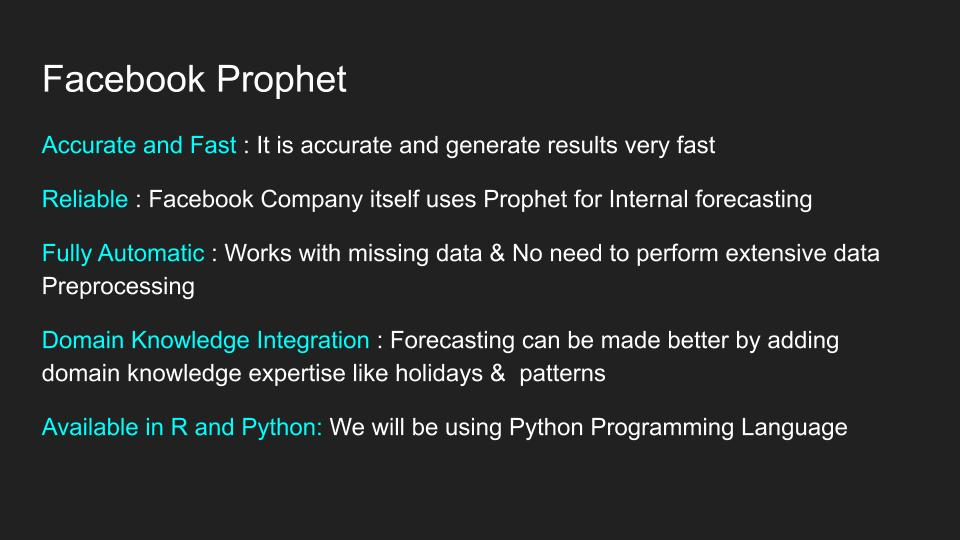

## Data Preperation

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,93.900002,98.973999,88.433998,89.014000,89.014000,102447500
1,2020-03-17,88.001999,94.370003,79.199997,86.040001,86.040001,119973000
2,2020-03-18,77.800003,80.972000,70.101997,72.244003,72.244003,118931000
3,2020-03-19,74.940002,90.400002,71.692001,85.528000,85.528000,150977500
4,2020-03-20,87.639999,95.400002,85.157997,85.505997,85.505997,141427500
...,...,...,...,...,...,...,...
246,2021-03-08,600.549988,620.130005,558.789978,563.000000,563.000000,51787000
247,2021-03-09,608.179993,678.090027,595.210022,673.580017,673.580017,67523300
248,2021-03-10,700.299988,717.849976,655.059998,668.059998,668.059998,60605700
249,2021-03-11,699.400024,702.500000,677.179993,699.599976,699.599976,36253900


In [ ]:
columns =['Date',"Close"] 
ndf = pd.DataFrame(df,columns=columns)

In [ ]:
ndf

,Date,Close
0,2020-03-16,89.014000
1,2020-03-17,86.040001
2,2020-03-18,72.244003
3,2020-03-19,85.528000
4,2020-03-20,85.505997
...,...,...
246,2021-03-08,563.000000
247,2021-03-09,673.580017
248,2021-03-10,668.059998
249,2021-03-11,699.599976


In [ ]:
#fbprophet doesnt understand Date and column. It understands ds and y. So we renmae it.
prophet_df =ndf.rename(columns={'Date':'ds', 'Close':'y'})

In [ ]:
prophet_df

,ds,y
0,2020-03-16,89.014000
1,2020-03-17,86.040001
2,2020-03-18,72.244003
3,2020-03-19,85.528000
4,2020-03-20,85.505997
...,...,...
246,2021-03-08,563.000000
247,2021-03-09,673.580017
248,2021-03-10,668.059998
249,2021-03-11,699.599976


## Creating Facebook Prophet Model

In [ ]:
m = Prophet()
m.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [ ]:
future = m.make_future_dataframe(periods=30) #since we have our data in days, 
#30 represents 30 days into the future
forecast_df = m.predict(future)

In [ ]:
forecast_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-16,65.592384,-28.482092,142.242929,65.592384,65.592384,-5.865511,-5.865511,-5.865511,-5.865511,-5.865511,-5.865511,0.0,0.0,0.0,59.726873
1,2020-03-17,67.387841,-26.328146,148.259910,67.387841,67.387841,-2.388676,-2.388676,-2.388676,-2.388676,-2.388676,-2.388676,0.0,0.0,0.0,64.999165
2,2020-03-18,69.183298,-20.854006,146.115467,69.183298,69.183298,-3.496043,-3.496043,-3.496043,-3.496043,-3.496043,-3.496043,0.0,0.0,0.0,65.687256
3,2020-03-19,70.978755,-23.733908,154.965105,70.978755,70.978755,-3.844838,-3.844838,-3.844838,-3.844838,-3.844838,-3.844838,0.0,0.0,0.0,67.133917
4,2020-03-20,72.774212,-21.760976,152.771306,72.774212,72.774212,-7.760562,-7.760562,-7.760562,-7.760562,-7.760562,-7.760562,0.0,0.0,0.0,65.013650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2021-04-07,900.261779,811.206789,986.319546,899.023747,901.438194,-3.496043,-3.496043,-3.496043,-3.496043,-3.496043,-3.496043,0.0,0.0,0.0,896.765737
277,2021-04-08,902.718796,818.189838,986.099957,901.408273,903.975227,-3.844838,-3.844838,-3.844838,-3.844838,-3.844838,-3.844838,0.0,0.0,0.0,898.873958
278,2021-04-09,905.175813,812.000792,987.042288,903.800998,906.492817,-7.760562,-7.760562,-7.760562,-7.760562,-7.760562,-7.760562,0.0,0.0,0.0,897.415251
279,2021-04-10,907.632829,835.169237,999.975466,906.198947,909.027485,11.677815,11.677815,11.677815,11.677815,11.677815,11.677815,0.0,0.0,0.0,919.310644


In [ ]:
#yhat-- is the predicted value
#so lets use plotly express to look at the yhat column


In [ ]:
px.line(forecast_df,x='ds',y='yhat')
#notice the linearly increasing line. This means that fbprophet is predicting that there is going to 
#be a steady increase in the stocks of tesla for the coming 30 days

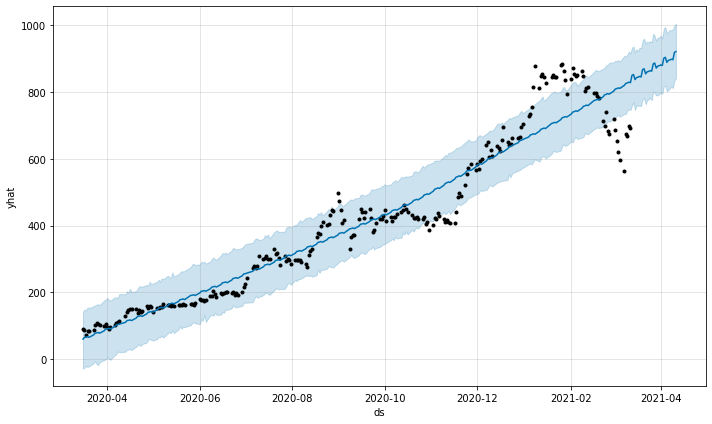

In [ ]:
figure= m.plot(forecast_df,xlabel='ds',ylabel='yhat') 
#forecast of the price. This helps the investors buy/sell according to the trends

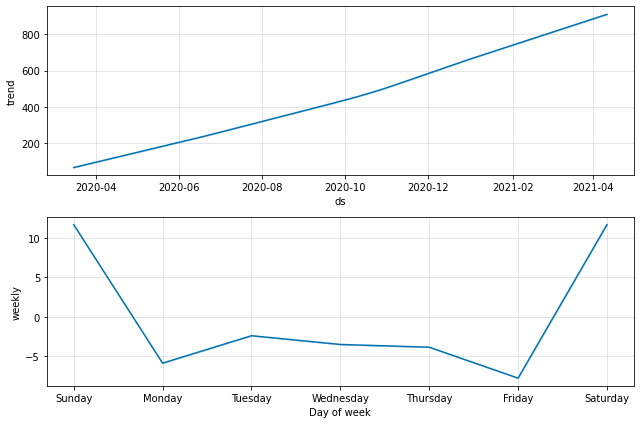

In [ ]:
#visualising trends
figure2= m.plot_components(forecast_df)

##Downloading the Forecast data

In [ ]:
from google.colab import files
forecast_df.to_csv('FORECAST.csv')
files.download('FORECAST.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# so far, we have forecasted the data 30 days into the future. 
#Now, lets go to the google sheets and understand its performance.
#evaluate the real data on google sheets